In [32]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [33]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [34]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [35]:
# Test if API keys are properly loaded in by using 'type'-function and see if it returns string

type(os.getenv("ALPACA_API_KEY"))
type(os.getenv("ALPACA_SECRET_KEY"))

str

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [36]:
# YOUR CODE HERE

# Set the list of tickers
list_of_tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
alpaca_df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

alpaca_df.head()

AGG                                        \
                             open     high       low    close    volume   
time                                                                      
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877   
2019-01-08 00:00:00-05:00  106.40  106.530  105.5300  106.420   3818241   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  256.82  257.31  254.00  256.65   88864452

In [37]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
alpaca_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
alpaca_df.head()

,AGG,SPY
,close,close
time,,
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [38]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

# Use the `pct_change` function to calculate daily returns of `AGG` and `SPY`.
daily_returns = alpaca_df.pct_change()
daily_returns.head()

# Use the `mean` function to calculate the mean of daily returns for `TLSA` and `SPHD`, respectively
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']

In [39]:
# Calculate volatility
# YOUR CODE HERE

# Use the `std` function to calculate the standard deviation of daily returns for `AGG` and `SPY`
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']

print(f"The standard deviation of daily returns for AGG is {std_dev_daily_return_agg}")
print(f"The standard deviation of daily returns for SPY is {std_dev_daily_return_spy}")

The standard deviation of daily returns for AGG is 0.002089826211646555
The standard deviation of daily returns for SPY is 0.007820053413439366


In [40]:
# Save the last day's closing price
# YOUR CODE HERE

agg_last_price = alpaca_df['AGG']['close'][-1]
spy_last_price = alpaca_df['SPY']['close'][-1]

In [41]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
# monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [42]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # YOUR CODE HERE
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
        
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.4, 0.6]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

In [43]:
# Visualize the Simulation
# YOUR CODE HERE
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000476,1.000536,0.998808,1.005394,1.011797,0.994452,0.997251,1.013277,1.000869,0.995376,...,1.002066,0.992709,1.001801,1.002671,0.996472,1.003160,1.001638,1.006800,0.998173,0.994765
2,1.008876,1.004699,1.003590,0.996711,1.009571,0.994247,0.994214,1.007199,1.000225,0.993036,...,1.005759,0.994517,1.003317,1.006181,0.997472,0.991774,1.002764,1.005408,0.996137,0.998871
3,1.008286,1.004228,1.003770,0.998232,1.007751,0.987669,0.998229,1.001361,1.000230,1.001279,...,1.006771,0.988444,1.004118,1.010565,0.993293,0.994454,1.008272,0.999144,0.998656,1.003328
4,1.013963,1.006575,1.008493,1.002636,1.013664,0.990972,1.003241,0.995491,1.002048,1.006036,...,1.004196,0.992123,1.004724,1.004423,0.994844,0.993782,1.005722,1.002248,0.996964,1.004095
5,1.016865,0.999694,1.001493,1.016174,1.011404,0.989529,1.007597,0.997137,1.010585,1.001112,...,1.001935,0.994918,0.996562,1.003819,0.995532,0.989139,0.987618,1.005462,0.995584,1.002235
6,1.014970,0.994634,1.002977,1.016080,1.008689,0.994838,1.002579,0.999368,1.010472,0.998744,...,1.009679,0.998872,0.995573,1.007189,0.989045,0.987965,0.995397,1.000197,0.996103,1.007646
7,1.006784,0.994940,1.011370,1.024488,1.010475,0.997587,1.002656,0.995781,1.006780,1.002243,...,1.007757,1.003213,1.002979,1.009484,0.991149,0.989242,0.996225,1.006241,0.990781,1.014262
8,1.003390,1.004256,1.011293,1.030078,1.007390,1.000017,0.998644,0.998111,1.004555,1.005715,...,1.010607,1.005153,1.003617,1.010355,0.992840,0.991361,1.002771,1.009447,0.992658,1.012774
9,1.004732,1.008167,1.008684,1.026804,1.000158,0.993488,1.003562,0.999380,1.007446,1.005680,...,1.000480,1.009968,1.012138,1.010410,0.997699,0.994002,1.013189,1.011004,0.987581,1.013328


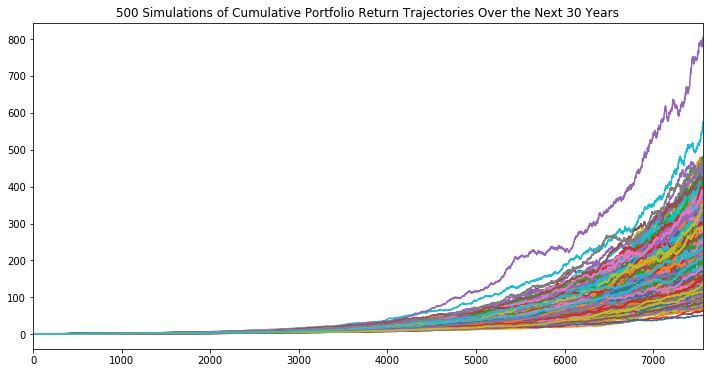

In [44]:
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
monte_carlo_plot = portfolio_cumulative_returns.plot(legend=False, title=plot_title, figsize=(12, 6))
monte_carlo_plot

In [45]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE

ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns

0      192.773859
1      171.964137
2      177.998514
3      138.466715
4      175.628015
5      406.591807
6      102.238497
7      209.333610
8      178.373559
9      153.122026
10     219.817397
11     238.721221
12      94.964707
13     125.801443
14     392.184534
15     220.309699
16     142.691369
17     131.589891
18     257.483527
19     102.827602
20      94.073043
21     405.637173
22      96.894862
23     387.670855
24     364.366994
25     269.652330
26     113.940770
27     226.299679
28     170.523175
29     142.505999
          ...    
470    110.421785
471    217.783220
472    200.393657
473    199.280464
474    107.800746
475    118.365085
476    141.864376
477    174.372456
478    115.615426
479    180.808364
480    174.302715
481    285.441018
482    230.530394
483    300.612151
484    215.462117
485    270.108744
486    252.337331
487    126.412652
488    292.868077
489    235.356248
490    206.830738
491    209.789815
492    200.640118
493    149.221946
494    214

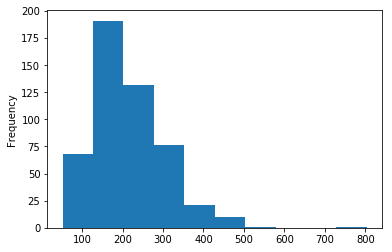

In [46]:
# plo frequency distribution of ending cumulative returns

ending_cumulative_returns.plot(kind='hist', bins=10)

In [47]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

# simulation is for 30 years, so cumulative returns at 20 years needs to iloc for 5041 

ending_cumulative_returns20yr = portfolio_cumulative_returns.iloc[5041, :]
ending_cumulative_returns20yr

0      33.444400
1      30.894657
2      27.872681
3      25.002034
4      47.062956
5      69.769374
6      22.732358
7      32.034989
8      29.444054
9      25.014526
10     46.238201
11     38.444927
12     16.402299
13     23.239782
14     41.650688
15     63.470324
16     27.224768
17     23.633264
18     43.394837
19     23.604884
20     25.524836
21     72.471929
22     18.933389
23     49.731050
24     41.011662
25     39.854343
26     19.755340
27     30.718469
28     37.056738
29     28.487470
         ...    
470    25.582077
471    43.694446
472    41.066525
473    30.407911
474    19.661655
475    20.607662
476    25.961001
477    31.793646
478    20.651671
479    32.894805
480    35.717575
481    39.739963
482    50.105692
483    40.885714
484    44.993267
485    42.086670
486    40.061904
487    38.847565
488    41.527015
489    50.705011
490    34.604039
491    27.836659
492    33.339205
493    24.625272
494    31.460622
495    64.597600
496    39.657759
497    73.2454

In [48]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

# Use the `quantile` function to calculate the 90% confidence interval for simulated ending prices
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    102.825606
0.95    379.341808
Name: 7560, dtype: float64

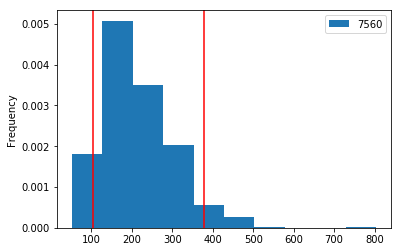

In [49]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist',legend=True, density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [50]:
# YOUR CODE HERE
percentile_10 = np.percentile(ending_cumulative_returns, 10)
percentile_50 = np.percentile(ending_cumulative_returns, 50)
percentile_90 = np.percentile(ending_cumulative_returns, 90)
print(percentile_10)
print(percentile_50)
print(percentile_90)

119.02748490144215
199.08385717168764
320.56154856359313


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [51]:
# YOUR CODE HERE

expected_portfolio_return10 = 20000 + (20000 * percentile_10)
expected_portfolio_return50 = 20000 + (20000 * percentile_50)
expected_portfolio_return90 = 20000 + (20000 * percentile_90)

print(expected_portfolio_return10)
print(expected_portfolio_return50)
print(expected_portfolio_return90)

2400549.698028843
4001677.143433753
6431230.971271862


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [52]:
# YOUR CODE HERE

projected_yearly_income = 6085  #(see account summary exercise)
retirement_withdraw_10 = expected_portfolio_return10 * 0.04
retirement_withdraw_10


96021.98792115372

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [53]:
# YOUR CODE HERE

expected_portfolio_return10_30k = 30000 + (30000 * percentile_10)
expected_portfolio_return50_30k = 30000 + (30000 * percentile_50)
expected_portfolio_return90_30k = 30000 + (30000 * percentile_90)

print(expected_portfolio_return10_30k)
print(expected_portfolio_return50_30k)
print(expected_portfolio_return90_30k)


3600824.5470432644
6002515.715150629
9646846.456907794


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [56]:
# YOUR CODE HERE

# first day/last day
# expected cumulative returns 

# Use the Monte Carlo data and calculate the cumulative returns at the 5%, 50%, and 95% quartiles

projected_returns = portfolio_cumulative_returns.quantile(q=[0.05, 0.5, 0.95], axis=1).transpose()
projected_returns.head()


,0.05,0.5,0.95
0,1.000000,1.000000,1.000000
1,0.992691,1.000785,1.008573
2,0.990438,1.001287,1.013288
3,0.989383,1.002328,1.015727
4,0.988241,1.002972,1.018309


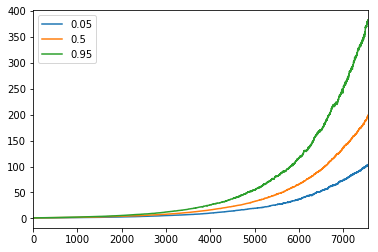

In [55]:
projected_returns.plot()


In [65]:
# different risk portfolios

# Set the portfolio weights (60% SPY; 40% AGG)
new_weights = [0.2, 0.8]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
portfolio_daily_returns = simulated_daily_returns.dot(new_weights)
    
    # Calculate the normalized, cumulative return series
portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
    
    # 
portfolio_cumulative_returns.head(11)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000476,1.000536,0.998808,1.005394,1.011797,0.994452,0.997251,1.013277,1.000869,0.995376,...,1.002066,0.992709,1.001801,1.002671,0.996472,1.003160,1.001638,1.006800,0.998173,0.993271
2,1.008876,1.004699,1.003590,0.996711,1.009571,0.994247,0.994214,1.007199,1.000225,0.993036,...,1.005759,0.994517,1.003317,1.006181,0.997472,0.991774,1.002764,1.005408,0.996137,0.998273
3,1.008286,1.004228,1.003770,0.998232,1.007751,0.987669,0.998229,1.001361,1.000230,1.001279,...,1.006771,0.988444,1.004118,1.010565,0.993293,0.994454,1.008272,0.999144,0.998656,1.004500
4,1.013963,1.006575,1.008493,1.002636,1.013664,0.990972,1.003241,0.995491,1.002048,1.006036,...,1.004196,0.992123,1.004724,1.004423,0.994844,0.993782,1.005722,1.002248,0.996964,1.005002
5,1.016865,0.999694,1.001493,1.016174,1.011404,0.989529,1.007597,0.997137,1.010585,1.001112,...,1.001935,0.994918,0.996562,1.003819,0.995532,0.989139,0.987618,1.005462,0.995584,1.002421
6,1.014970,0.994634,1.002977,1.016080,1.008689,0.994838,1.002579,0.999368,1.010472,0.998744,...,1.009679,0.998872,0.995573,1.007189,0.989045,0.987965,0.995397,1.000197,0.996103,1.010347
7,1.006784,0.994940,1.011370,1.024488,1.010475,0.997587,1.002656,0.995781,1.006780,1.002243,...,1.007757,1.003213,1.002979,1.009484,0.991149,0.989242,0.996225,1.006241,0.990781,1.019887
8,1.003390,1.004256,1.011293,1.030078,1.007390,1.000017,0.998644,0.998111,1.004555,1.005715,...,1.010607,1.005153,1.003617,1.010355,0.992840,0.991361,1.002771,1.009447,0.992658,1.016299
9,1.004732,1.008167,1.008684,1.026804,1.000158,0.993488,1.003562,0.999380,1.007446,1.005680,...,1.000480,1.009968,1.012138,1.010410,0.997699,0.994002,1.013189,1.011004,0.987581,1.015571


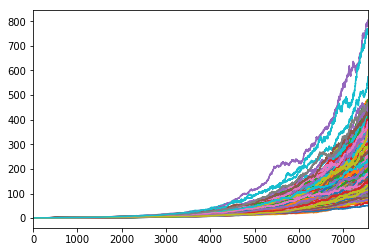

In [63]:
portfolio_cumulative_returns.plot(legend=False)